In [79]:
#declaramos librebia
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.python.framework import ops
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
a=2196 #ponemos semilla
np.random.seed(a)
tf.random.set_seed(a)
a

2196

In [80]:
pd.set_option('display.max_rows', 12)
DataFrameOrg=pd.read_csv('infarto.csv',delimiter=';')
DataFrameOrg

,id,genero,edad,hipertensión,enfermedad_coronaria,casado,trabajo,residencia,nivel_glucosa,bmi,uso_tabaco,infarto
0,9046,Masculino,67.0,0,1,Si,Privado,Urbana,228.69,36.6,Ex fumador,1
1,51676,Femenino,61.0,0,0,Si,Autonomo,Rural,202.21,NaN,Nunca,1
2,31112,Masculino,80.0,0,1,Si,Privado,Rural,105.92,32.5,Nunca,1
3,60182,Femenino,49.0,0,0,Si,Privado,Urbana,171.23,34.4,Fumador,1
4,1665,Femenino,79.0,1,0,Si,Autonomo,Rural,174.12,24.0,Nunca,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Femenino,80.0,1,0,Si,Privado,Urbana,83.75,NaN,Nunca,0
5106,44873,Femenino,81.0,0,0,Si,Autonomo,Urbana,125.20,40.0,Nunca,0
5107,19723,Femenino,35.0,0,0,Si,Autonomo,Rural,82.99,30.6,Nunca,0
5108,37544,Masculino,51.0,0,0,Si,Privado,Rural,166.29,25.6,Ex fumador,0


In [81]:
DataFrame=DataFrameOrg.drop(columns=["id"])
DataFrame.isnull().sum()

genero                    0
edad                      0
hipertensión              0
enfermedad_coronaria      0
casado                    0
trabajo                   0
residencia                0
nivel_glucosa             0
bmi                     201
uso_tabaco                0
infarto                   0
dtype: int64

In [82]:
DataFrameSinNa=DataFrame.dropna().copy()
DataFrameSinNa.dtypes

genero                   object
edad                    float64
hipertensión              int64
enfermedad_coronaria      int64
casado                   object
trabajo                  object
residencia               object
nivel_glucosa           float64
bmi                     float64
uso_tabaco               object
infarto                   int64
dtype: object

In [83]:
DataFrameSinNa['genero'].value_counts()

Femenino     2897
Masculino    2011
Other           1
Name: genero, dtype: int64

In [84]:
DataFrameSinNa['casado'].value_counts()

Si    3204
No    1705
Name: casado, dtype: int64

In [85]:
DataFrameSinNa['trabajo'].value_counts()

Privado          2811
Autonomo          775
Menor de edad     671
Funcionario       630
Sin trabajo        22
Name: trabajo, dtype: int64

In [86]:
DataFrameSinNa['residencia'].value_counts()

Urbana    2490
Rural     2419
Name: residencia, dtype: int64

In [87]:
DataFrameSinNa['uso_tabaco'].value_counts()

Nunca         1852
NSNC          1483
Ex fumador     837
Fumador        737
Name: uso_tabaco, dtype: int64

In [88]:
DNumeric=DataFrameSinNa.copy()
DNumeric['genero'] = DNumeric['genero'].astype('category')
DNumeric['casado'] = DNumeric['casado'].astype('category')
DNumeric['trabajo'] = DNumeric['trabajo'].astype('category')
DNumeric['residencia'] = DNumeric['residencia'].astype('category')
DNumeric['uso_tabaco'] = DNumeric['uso_tabaco'].astype('category')

DNumeric['edad'] = np.select([DNumeric['edad']>=75, DNumeric['edad']>=50,DNumeric['edad']>=25],[1, 2,3], default=4)
DNumeric['bmi'] = np.select([DNumeric['bmi']>=30, DNumeric['bmi']>=24.9,DNumeric['bmi']>=18.5],[0, 1,2], default=3)
DNumeric['nivel_glucosa'] = np.select([DNumeric['nivel_glucosa']>=200, DNumeric['nivel_glucosa']>=150],[0, 1], default=2)
DNumeric

,genero,edad,hipertensión,enfermedad_coronaria,casado,trabajo,residencia,nivel_glucosa,bmi,uso_tabaco,infarto
0,Masculino,2,0,1,Si,Privado,Urbana,0,0,Ex fumador,1
2,Masculino,1,0,1,Si,Privado,Rural,2,0,Nunca,1
3,Femenino,3,0,0,Si,Privado,Urbana,1,0,Fumador,1
4,Femenino,1,1,0,Si,Autonomo,Rural,1,2,Nunca,1
5,Masculino,1,0,0,Si,Privado,Urbana,1,1,Ex fumador,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Femenino,4,0,0,No,Menor de edad,Rural,2,2,NSNC,0
5106,Femenino,1,0,0,Si,Autonomo,Urbana,2,0,Nunca,0
5107,Femenino,3,0,0,Si,Autonomo,Rural,2,0,Nunca,0
5108,Masculino,2,0,0,Si,Privado,Rural,1,1,Ex fumador,0


In [89]:
DNumeric["genero"] = DNumeric["genero"].cat.codes
DNumeric["casado"] = DNumeric["casado"].cat.codes
DNumeric["trabajo"] = DNumeric["trabajo"].cat.codes
DNumeric["residencia"] = DNumeric["residencia"].cat.codes
DNumeric["uso_tabaco"] = DNumeric["uso_tabaco"].cat.codes

#DNumeric=DNumeric.drop(columns=["residencia"])


In [90]:
numeroinfartos=DataFrameSinNa['infarto'].value_counts()[1]
numeroinfartos

209

In [91]:
Dseparacion=DNumeric.copy()
y=Dseparacion.infarto
Dseparacion=Dseparacion.drop(columns=["infarto"])
y = np.array(y)
Ytotales=y.reshape(y.shape[0],1)
Ytotales

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [92]:
x = Dseparacion.values #returns a numpy array
scaler = preprocessing.MinMaxScaler()
Xtotales = scaler.fit_transform(x)
Xtotales

array([[0.5       , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.66666667, 0.        , ..., 0.5       , 0.        ,
        0.33333333],
       ...,
       [0.        , 0.66666667, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 0.33333333, 0.        , ..., 0.5       , 0.33333333,
        0.        ],
       [0.        , 0.66666667, 0.        , ..., 1.        , 0.33333333,
        0.66666667]])

In [93]:
Xinfartos=Xtotales[:numeroinfartos]
Yinfartos=Ytotales[:numeroinfartos]
Xinfartos, X_test0, Yinfartos, Y_test0 = train_test_split(Xinfartos,Yinfartos, test_size=0.1,random_state=42)
Xinfartos, X_validation0, Yinfartos, Y_validation0 = train_test_split(Xinfartos,Yinfartos, test_size=0.1,random_state=42)
XtotalesSinInfartos=Xtotales[numeroinfartos:]
YtotalesSinInfartos=Ytotales[numeroinfartos:]

In [94]:
X, X_test, Y, Y_test = train_test_split(XtotalesSinInfartos,YtotalesSinInfartos, test_size=0.15,random_state=42)
X, X_validation, Y, Y_validation = train_test_split(X,Y, test_size=0.15,random_state=42)


X = np.concatenate((Xinfartos, X))
Y = np.concatenate((Yinfartos, Y))

X_test = np.concatenate((X_test0, X_test))
Y_test = np.concatenate((Y_test0, Y_test))

X_validation = np.concatenate((X_validation0, X_validation))
Y_validation = np.concatenate((Y_validation0, Y_validation))

In [95]:
model=Sequential()

In [96]:
model.add(Dense(100,input_dim=Dseparacion.shape[1],activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [98]:
hist=model.fit(X, Y,batch_size=32,validation_data=(X_validation,Y_validation), epochs=35)

Epoch 1/35
112/112 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9512 - val_loss: 0.0295 - val_accuracy: 0.9693
Epoch 2/35
112/112 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9526 - val_loss: 0.0301 - val_accuracy: 0.9693
Epoch 3/35
112/112 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9526 - val_loss: 0.0300 - val_accuracy: 0.9693
Epoch 4/35
112/112 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9526 - val_loss: 0.0296 - val_accuracy: 0.9693
Epoch 5/35
112/112 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9526 - val_loss: 0.0311 - val_accuracy: 0.9693
Epoch 6/35
112/112 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9526 - val_loss: 0.0319 - val_accuracy: 0.9693
Epoch 7/35
112/112 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9526 - val_loss: 0.0307 - val_accuracy: 0.9693
Epoch 

In [99]:
model.evaluate(X, Y) # del train

112/112 [==============================] - 0s 750us/step - loss: 0.0356 - accuracy: 0.9579


[0.03563668951392174, 0.9579124450683594]

In [100]:
model.evaluate(X_validation, Y_validation) # del validation

20/20 [==============================] - 0s 949us/step - loss: 0.0352 - accuracy: 0.9693


[0.03515375405550003, 0.9693053364753723]

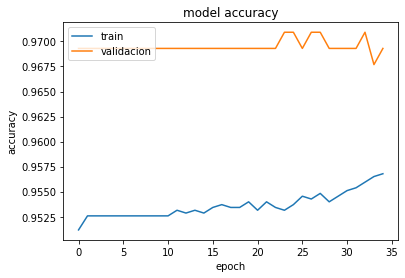

In [101]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validacion'], loc='upper left')
plt.show()


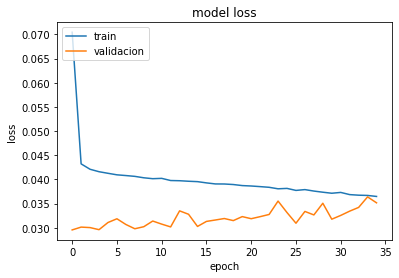

In [102]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validacion'], loc='upper left')
plt.show()

### Confusion matrix Total de datos

[[  23  186]
 [   5 4695]]


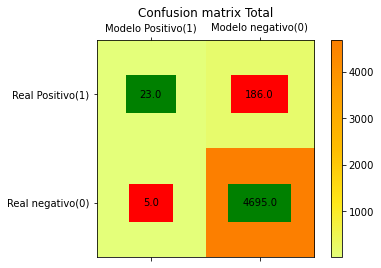

In [103]:
YpredictT=model(Xtotales)
YpredictT=YpredictT.numpy()
YpredictT=YpredictT.round()
YpredictT = YpredictT.astype(np.int64)
labl=[1,0]
matrix = confusion_matrix(Ytotales.flatten(), YpredictT.flatten(),labels=labl)

print(matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix,cmap='Wistia')#RdYlGn
plt.title('Confusion matrix Total')

#fig.colorbar(cax)
ax.set_xticks(labl)
ax.set_yticks(labl)
ax.set_xticklabels(['Modelo negativo(0)','Modelo Positivo(1)'])
ax.set_yticklabels(['Real negativo(0)','Real Positivo(1)'])
plt.colorbar(cax)

for (i, j), z in np.ndenumerate(matrix):
    t=ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    if i ==j:
        t.set_bbox(dict(facecolor='green', edgecolor='green' ,linewidth=20))
    else:
        t.set_bbox(dict(facecolor='red', edgecolor='red' ,linewidth=20))

plt.show()


### Confusion matrix datos de prueba

[[  0  21]
 [  1 704]]


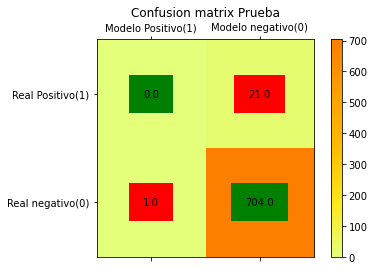

In [104]:
Ypredict=model(X_test)
Ypredict=Ypredict.numpy()
Ypredict=Ypredict.round()
Ypredict = Ypredict.astype(np.int64)
labl=[1,0]
matrix = confusion_matrix(Y_test.flatten(), Ypredict.flatten(),labels=labl)

print(matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix,cmap='Wistia')#RdYlGn
plt.title('Confusion matrix Prueba')

#fig.colorbar(cax)
ax.set_xticks(labl)
ax.set_yticks(labl)
ax.set_xticklabels(['Modelo negativo(0)','Modelo Positivo(1)'])
ax.set_yticklabels(['Real negativo(0)','Real Positivo(1)'])
plt.colorbar(cax)

for (i, j), z in np.ndenumerate(matrix):
    t=ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    if i ==j:
        t.set_bbox(dict(facecolor='green', edgecolor='green' ,linewidth=20))
    else:
        t.set_bbox(dict(facecolor='red', edgecolor='red' ,linewidth=20))

plt.show()

![title](a.png)

### Test

In [105]:
print("precision test:" + str(precision_score(Y_test, Ypredict))) 
print("recall test:" + str(recall_score(Y_test, Ypredict)))
print("accuracy test:" + str(accuracy_score(Y_test, Ypredict))) 


precision test:0.0
recall test:0.0
accuracy test:0.9696969696969697


### Totales

In [106]:
print("precision total:" + str(precision_score(Ytotales, YpredictT))) 
print("recall total:" + str(recall_score(Ytotales, YpredictT))) 
print("accuracy total:" + str(accuracy_score(Ytotales, YpredictT))) 

precision total:0.8214285714285714
recall total:0.11004784688995216
accuracy total:0.961091872071705


### que caracteristica influye mas o menos

In [107]:
temp=abs(model.get_weights()[0])
for index,x in enumerate(temp):
    print(Dseparacion.columns[index])
    print(x.mean())

genero
0.1531346
edad
0.17352921
hipertensión
0.1331251
enfermedad_coronaria
0.13043082
casado
0.14677404
trabajo
0.12831633
residencia
0.11796103
nivel_glucosa
0.15209965
bmi
0.15794687
uso_tabaco
0.14473811
